In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# Previous cell doesn't add this, so done manually
sys.path.append('C:\\Users\\bde2002.53381\\Desktop\\master-thesis')

In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import random
from datetime import date
import datetime as DT
from datetime import datetime
import plotly.graph_objects as go
from sklearn.pipeline import Pipeline
from collections import Counter
from matplotlib import pyplot

from quality_evaluation.predictive_metrics import *

In [4]:
## Assuming that data is prepared:
# - target variable is added and last column
# - variables are added (age) and removed (dates, vital status)
# - categorical variables are encoded appropriatley (ordinal vs nominal)
# - missing values are handled appropriately
# - dummy columns to be dropped are specified outside of function or during preparation

In [5]:
# Load the original and validation dataframes
df_ori = pd.read_csv("C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\data\\data_prepared_for_predictive_metrics\\df_ori_1_binned_p.csv") # This is the original data WITHOUT the holdout validation set
df_ori_val = pd.read_csv("C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\data\\data_prepared_for_predictive_metrics\\df_val_1_binned_p.csv")

In [6]:
epsilon_names = ['10','1','0_1','0_01','0_001']
ms_privacy_levels = []
pb_privacy_levels = []

g = globals()

# The following cells lead to a list (e.g. syn_10) with all the versions of that privacy level, 
# and then to a list privacy_levels that contains all these sublists of the different privay levels with their versions

In [7]:
# Load ms dataframes for dataset 1
for epsilon in epsilon_names:
    syn_name = 'ms_syn_{}'.format(epsilon)
    g[syn_name] = []
    for versie in range(1,6):
        df = pd.read_csv("C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\data\\data_prepared_for_predictive_metrics\\ms\\ms_df_syn_1_e{}_v{}_p.csv".format(epsilon, versie))
        g[syn_name].append(df)
    ms_privacy_levels.append(g[syn_name])

In [8]:
# Load pb dataframes for dataset 1
for epsilon in epsilon_names:
    syn_name = 'pb_syn_{}'.format(epsilon)
    g[syn_name] = []
    for versie in range(1,6):
        df = pd.read_csv("C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\data\\data_prepared_for_predictive_metrics\\pb\\pb_df_syn_1_e{}_v{}_p.csv".format(epsilon, versie))
        g[syn_name].append(df)
    pb_privacy_levels.append(g[syn_name])

In [9]:
# Dropdummies and num_vars should be specified or can be left None if already taken care of during preperation
dropdummies = ['stage_2A', 'subloc_7', "diagnosis_age_71-90", "lymph_pos_0"]
num_vars = ['tum_differentiatiegraad_code', 'pat_geslacht_code']
models = [LogisticRegression(), DecisionTreeClassifier()]

In [10]:
# Do for one DP algorithm at a time
privacy_levels = pb_privacy_levels

pb_TB_TOH_ORI, pb_TB_TOH, pb_TB_TOH_ERRORS = TB_TOHmodels(models, df_ori, privacy_levels, df_ori_val, dropdummies=None, num_vars=num_vars)

Applied model is LogisticRegression
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
ori: LogisticRegression(C=10, max_iter=4000)
Prediction accuracy of original model: 0.7558280351195883
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
syn: LogisticRegression(C=0.1, max_iter=4000)
Prediction accuracy of synthetic model: 0.7514380865879503
syn: LogisticRegression(C=10, max_iter=4000)
Prediction accuracy of synthetic model: 0.7531789282470481
syn: LogisticRegression(C=1, max_iter=4000)
Prediction accuracy of synthetic model: 0.7524598849530729
syn: LogisticRegression(C=10, max_iter=4000)
Prediction accuracy of synthetic model: 0.7515516197396307
syn: LogisticRegression(C=0.1, max_iter=4000)
Prediction accuracy of synthetic model: 0.7512110202845897
TB-TOH Accuracy Difference: 0.003860127157129911 with standard deviation: 0.0007396616820198283
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code'

syn: DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=0.005)
Prediction accuracy of synthetic model: 0.5894262791401756
TB-TOH Accuracy Difference: 0.15145322434150765 with standard deviation: 0.07775448577849044
syn: DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=0.005)
Prediction accuracy of synthetic model: 0.34120496518316684
syn: DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=0.005)
subloc_5 not present in synthetic dataset, thus dropped from validation set
stage_3A not present in synthetic dataset, thus dropped from validation set
Prediction accuracy of synthetic model: 0.5263396911898274
syn: DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=0.005)
subloc_4 not present in synthetic dataset, thus dropped from validation set
stage_2 not present in synthetic dataset, thus dropped from validation set
Prediction accuracy of synthetic model: 0.5572963972146533
syn: DecisionTreeClassi

In [11]:
# Do for one DP algorithm at a time
privacy_levels = ms_privacy_levels

ms_TB_TOH_ORI, ms_TB_TOH, ms_TB_TOH_ERRORS = TB_TOHmodels(models, df_ori, privacy_levels, df_ori_val, dropdummies=None, num_vars=num_vars)

Applied model is LogisticRegression
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
ori: LogisticRegression(C=10, max_iter=4000)
Prediction accuracy of original model: 0.7558280351195883
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
syn: LogisticRegression(C=0.0001, max_iter=4000)
Prediction accuracy of synthetic model: 0.5772025431425977
syn: LogisticRegression(C=0.0001, max_iter=4000)
Prediction accuracy of synthetic model: 0.5772025431425977
syn: LogisticRegression(C=0.0001, max_iter=4000)
Prediction accuracy of synthetic model: 0.5772025431425977
syn: LogisticRegression(C=0.0001, max_iter=4000)
Prediction accuracy of synthetic model: 0.5772025431425977
syn: LogisticRegression(C=0.0001, max_iter=4000)
Prediction accuracy of synthetic model: 0.5772025431425977
TB-TOH Accuracy Difference: 0.17862549197699062 with standard deviation: 0.0
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code'

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

Only one class left in synthetic dataset, no Logistic Regression possible. Prediction accuracy is set to 0
syn: LogisticRegression(C=0.0001, max_iter=4000)
subloc_3 not present in synthetic dataset, thus dropped from validation set
subloc_5 not present in synthetic dataset, thus dropped from validation set
subloc_6 not present in synthetic dataset, thus dropped from validation set
stage_3A not present in synthetic dataset, thus dropped from validation set
stage_3C not present in synthetic dataset, thus dropped from validation set
stage_4A not present in synthetic dataset, thus dropped from validation set
stage_4C not present in synthetic dataset, thus dropped from validation set
diagnosis_age_21-50 not present in synthetic dataset, thus dropped from validation set
Prediction accuracy of synthetic model: 0.5772025431425977
syn: LogisticRegression(C=0.0001, max_iter=4000)
subloc_5 not present in synthetic dataset, thus dropped from validation set
stage_3A not present in synthetic dataset

syn: DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=0.005)
subloc_3 not present in synthetic dataset, thus dropped from validation set
subloc_5 not present in synthetic dataset, thus dropped from validation set
subloc_6 not present in synthetic dataset, thus dropped from validation set
stage_3A not present in synthetic dataset, thus dropped from validation set
stage_3C not present in synthetic dataset, thus dropped from validation set
stage_4A not present in synthetic dataset, thus dropped from validation set
stage_4C not present in synthetic dataset, thus dropped from validation set
diagnosis_age_21-50 not present in synthetic dataset, thus dropped from validation set
Prediction accuracy of synthetic model: 0.5772025431425977
syn: DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=0.005)
subloc_5 not present in synthetic dataset, thus dropped from validation set
stage_3A not present in synthetic dataset, thus dropped from validation se

In [12]:
labels = ['very low', 'low', 'medium', 'high', 'very high']

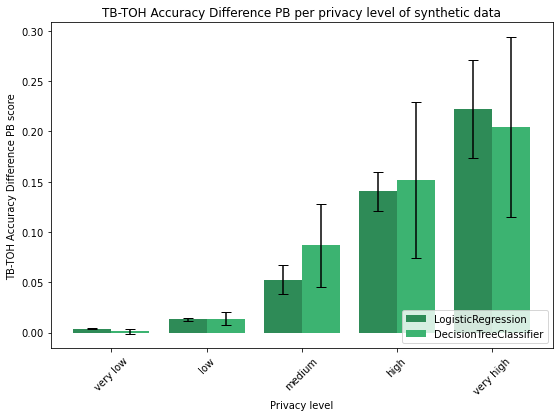

In [13]:
QMbar_one_DP_alg(QM=pb_TB_TOH, QMerror = pb_TB_TOH_ERRORS, QMname='TB-TOH Accuracy Difference PB', labels=labels)

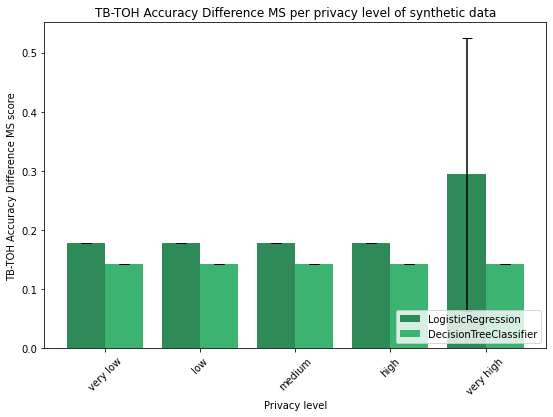

In [14]:
QMbar_one_DP_alg(QM=ms_TB_TOH, QMerror = ms_TB_TOH_ERRORS, QMname='TB-TOH Accuracy Difference MS', labels=labels)

# Combined visualization

In [15]:
QMori = ms_TB_TOH_ORI+pb_TB_TOH_ORI
QMTB_TOH = ms_TB_TOH+pb_TB_TOH
QMerror = ms_TB_TOH_ERRORS+pb_TB_TOH_ERRORS

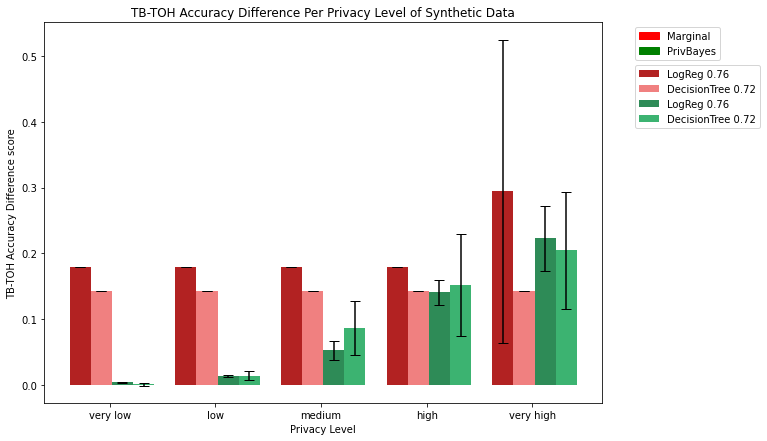

In [16]:
fig = QMbar_two_DP_algs(QM=QMTB_TOH, QMerror = QMerror, QMname='TB-TOH Accuracy Difference', QMori = QMori, labels=labels)
fig.savefig('C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\evaluation_results\\Final Result TB-TOH Accuracy Difference-subset_1.png', bbox_inches='tight', dpi=100)